<a href="https://colab.research.google.com/github/clashingera/LP/blob/main/Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
!pip install yfinance
import yfinance as yf

# Define Google stock (Alphabet Inc.)
google_stock = yf.Ticker('GOOG')

# Get historical stock data
data = google_stock.history(period="max")  # 'max' for the entire available period

# Display the first few rows
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19 00:00:00-04:00,2.478923,2.579567,2.378775,2.487352,897427216,0.0,0.0
2004-08-20 00:00:00-04:00,2.503960,2.704009,2.491318,2.684922,458857488,0.0,0.0
2004-08-23 00:00:00-04:00,2.745408,2.813082,2.703266,2.711942,366857939,0.0,0.0
2004-08-24 00:00:00-04:00,2.757554,2.766478,2.567421,2.599647,306396159,0.0,0.0
2004-08-25 00:00:00-04:00,2.601877,2.677238,2.575105,2.627658,184645512,0.0,0.0


In [ ]:
# Extract the "Close" price column
data = data['Close'].values

In [ ]:
# Reshape the data to a 2D array for scaling
data = data.reshape(-1, 1)

In [ ]:
# Normalize the stock prices to range between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
# Define the number of days to use for prediction (look-back window)
look_back = 60

# Prepare the data
X = []
y = []

for i in range(look_back, len(scaled_data)):
  X.append(scaled_data[i - look_back:i, 0]) # Use the last 60 days of data
  y.append(scaled_data[i, 0]) # The price on the current day (t)

# Convert the data into numpy arrays
X = np.array(X)
y = np.array(y)

# Reshape X to be 3D: [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
# Build the RNN model using LSTM
model = Sequential()

In [ ]:
# Add an LSTM layer
model.add(LSTM(units=50, return_sequences=False, input_shape=(X.shape[1], 1)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Add a dense output layer
model.add(Dense(units=1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(X, y, epochs=5, batch_size=32)

Epoch 1/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0238
Epoch 2/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 2.0957e-04
Epoch 3/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 1.8242e-04
Epoch 4/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 1.5990e-04
Epoch 5/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 1.5475e-04


In [ ]:
# Predict stock prices on the test data (the last 60 days)
predicted_stock_price = model.predict(X)

161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [ ]:
# Inverse transform to get the actual stock prices
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

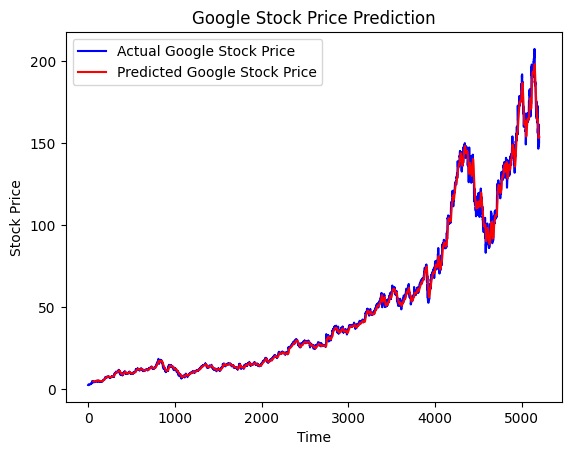

In [ ]:
# Plot the results
plt.plot(data, color='blue', label='Actual Google Stock Price')
plt.plot(np.arange(look_back, len(data)), predicted_stock_price, color='red', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y, predicted_stock_price)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4763.266456243631
